<a href="https://colab.research.google.com/github/EAsencios/DEEP-LEARING/blob/master/linear_regression02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

In [ ]:
scale_factor = 1000.0

# Scale the training set's label.
train_df['median_house_value'] /= scale_factor
# Scale the test set's label.
test_df['median_house_value'] /= scale_factor

In [ ]:
test_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344.700
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176.500
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270.500
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330.000
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81.700
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225.000
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237.200
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62.000
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162.500


In [ ]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model               


def train_model(model, df, feature, label, my_epochs, 
                my_batch_size=None, my_validation_split=0.1):
  """Feed a dataset into the model in order to train it."""

  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=my_batch_size,
                      epochs=my_epochs,
                      validation_split=my_validation_split)

  # Gather the model's trained weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Isolate the root mean squared error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse, history.history   

print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


In [ ]:
#@title Define the plotting function

def plot_the_loss_curve(epochs, mae_training, mae_validation):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
  plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
  plt.legend()
  
  # We're not going to plot the first epoch, since the loss on the first epoch
  # is often substantially greater than the loss for other epochs.
  merged_mae_lists = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_lists)
  lowest_loss = min(merged_mae_lists)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)
   
  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


In [ ]:
shuffled_train_df = train_df.reindex(np.random.permutation(train_df.index))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/70
136/136 [==============================] - 0s 2ms/step - loss: 44568.2617 - root_mean_squared_error: 211.1120 - val_loss: 34063.5195 - val_root_mean_squared_error: 184.5630
Epoch 2/70
136/136 [==============================] - 0s 2ms/step - loss: 26159.8477 - root_mean_squared_error: 161.7401 - val_loss: 18992.2793 - val_root_mean_squared_error: 137.8125
Epoch 3/70
136/136 [==============================] - 0s 2ms/step - loss: 14058.0791 - root_mean_squared_error: 118.5668 - val_loss: 10110.5918 - val_root_mean_squared_error: 100.5514
Epoch 4/70
136/136 [==============================] - 0s 1ms/step - loss: 8153.4800 - root_mean_squared_error: 90.2966 - val_loss: 7144.1182 - val_root_mean_squared_error: 84.5229
Epoch 5/70
136/136 [==============================] - 0s 2ms/step - loss: 7004.7065 - root_mean_squared_error: 83.6941 - val_loss: 7084.2036 - val_root_mean_squared_error: 84.1677
Epoch 6/70
136/136 [==============================] - 0s 1ms/step - loss: 6997.2808 - ro

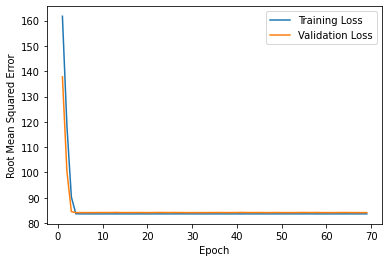

In [ ]:

# The following variables are the hyperparameters.
learning_rate = 0.08
epochs = 70
batch_size = 100

# Split the original training set into a reduced training set and a
# validation set. 
validation_split = 0.2

# Identify the feature and the label.
my_feature = "median_income"    # the median income on a specific city block.
my_label = "median_house_value" # the median house value on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on the neighborhood's median income.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions to build and train the model.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, shuffled_train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

In [ ]:
x_test = test_df[my_feature]
Y_test = test_df[my_label]
print(Y_test)
result = my_model.evaluate(x_test, Y_test, batch_size=batch_size)

0       344.700
1       176.500
2       270.500
3       330.000
4        81.700
         ...   
2995    225.000
2996    237.200
2997     62.000
2998    162.500
2999    500.001
Name: median_house_value, Length: 3000, dtype: float64
30/30 [==============================] - 0s 942us/step - loss: 7011.7686 - root_mean_squared_error: 83.7363
